In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from sklearn import model_selection
import nltk 
import matplotlib.pyplot as plt
nltk.download('stopwords')

import string
punc=string.punctuation
stop=stopwords.words("english")
stop+=punc

train_data=pd.read_csv("C:/Users/JKC/political_leaders_final.csv", encoding = "ISO-8859-1", engine= 'python')
x=train_data.iloc[:,3]
y=train_data.iloc[:,5]
x=x.fillna("")
y=y.fillna("")

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.4)
#x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y,test_size=0.4)
test_data=pd.read_csv("C:/Users/JKC/political_leaders_perPolitician.csv", encoding = "ISO-8859-1", engine= 'python')

#x=train_data.iloc[:,3]
#y=train_data.iloc[:,4]
test_a=test_data.iloc[164:198,3]
#test_n=test_data.iloc[805:1018,3]
#test_r=test_data.iloc[1019:1052,3]
#test=x_test
#test_a=test_a.fillna("")
#test_r=test_r.fillna("")
test_n=test_n.fillna("")
#test = [test_a,test_n,test_r]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JKC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
x=np.array(x)
y=np.array(y)
test=np.array(test_n)


count_vec=CountVectorizer(max_features=80000,stop_words=stop,lowercase = True)
x_train_vec=count_vec.fit_transform(x_train)
x_test_vec=count_vec.transform(x_test)
test_vec=count_vec.transform(test)

clf=MultinomialNB()
clf.fit(x_train_vec,y_train)
y_pred=clf.predict(test_vec)
print(clf.score(x_test_vec,y_test))

np.savetxt("results.csv",y_pred,fmt="%s")
print (y_pred)

0.8783068783068783
[0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0
 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1
 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0]


In [110]:
def get_prob(y_pred):
    count=0
    for i in y_pred:
        if i==1:
            count+=1
    den=len(y_pred)
    return count,den

In [111]:
ans = get_prob(y_pred)
ans
prop = ans[0]
neut = ans[1] - prop

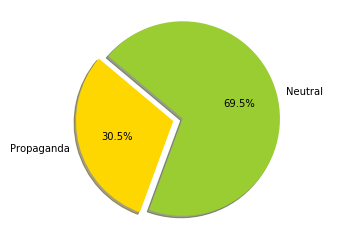

In [112]:
# Data to plot
labels = 'Propaganda', 'Neutral'
sizes = [prop, neut]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()